In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import config

In [2]:
anal_dir = config.analysis_directory
meta_dir = config.metadata_directory
df = pd.read_csv(f"{anal_dir}Korpela_polymorphism_alpha_divs_full.csv",index_col=0)
dates = pd.read_pickle(f"{meta_dir}Korpela_host_samples_timepoints.pkl")

In [3]:
df_gb = df.groupby(["subject_id","species_name"])

In [4]:
host,species = list(df_gb.groups.keys())[1]

In [5]:
species = "Eubacterium_rectale_56927"
host = "orion"
df_sp = df_gb.get_group((host,species))
df_sp["dates"] = [dates[host][k] for k in df_sp.index]

/u/local/apps/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
df_sp = df_sp.sort_values("dates")

/u/local/apps/python/3.7.2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/u/local/apps/python/3.7.2/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/u/local/apps/python/3.7.2/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


(1e-06, 1)

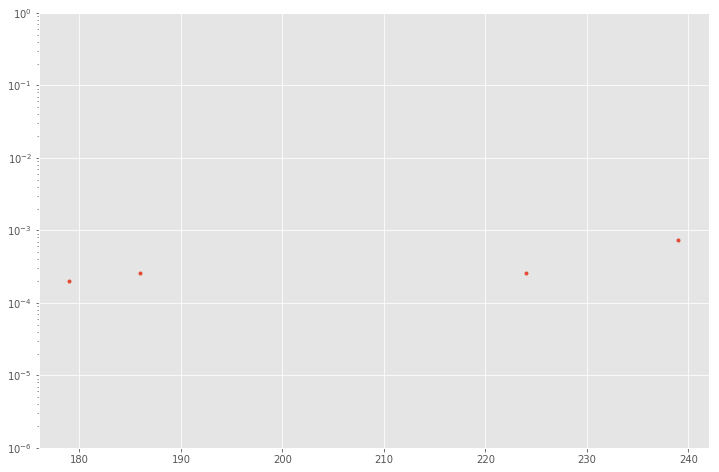

In [7]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df_sp["dates"],df_sp["polymorphism_rate"],'.')
ax.semilogy()
ax.set_ylim([1e-6,1])

In [8]:
pi_s = {}
for pair in df_gb.groups:
    df_sp = df_gb.get_group(pair)
    #df_sp["dates"] = [dates[host][k] for k in df_sp.index]
    #if np.all(df_sp["polymorphism_rate"] > 1e-3) and len(df_sp["polymorphism_rate"]) > 10:
    pi_s[pair] = list(df_sp["polymorphism_rate"])

In [10]:
pi_s

{('alien', 'Akkermansia_muciniphila_55290'): [0.0002124161202911,
  1.914074543198249e-05,
  2.7404494107292832e-05,
  1.9115421542347502e-05,
  5.5277310113770776e-05,
  3.847841527015756e-05,
  8.296767309302607e-05,
  1.911331424258151e-05,
  0.0005276856777709,
  0.0011009263170327],
 ('alien', 'Alistipes_onderdonkii_55464'): [9.115442500413403e-05,
  0.0002591162482148,
  8.276404651878731e-05],
 ('alien', 'Alistipes_putredinis_61533'): [0.0002145638563867,
  0.0001593964609676,
  8.388614711735091e-05,
  2.7396679135830634e-05,
  2.343783347198168e-05,
  7.335063180290435e-06],
 ('alien', 'Anaerostipes_hadrus_55206'): [0.0196609209992091,
  0.0021378211870576,
  0.0017878168585309,
  0.008117908564149,
  0.0020681007583058,
  0.0126498866029899,
  0.0007253204808154,
  0.016875139785418,
  0.0151660448311125,
  0.0006468539726528,
  0.0201704528501898],
 ('alien', 'Bacteroides_cellulosilyticus_58046'): [0.0001392885729653,
  0.0001283414725609,
  0.0002271864222162,
  0.000127955

In [11]:
pi_m = {}
for pair in df_gb.groups:
    pi_m[pair] = np.mean(pi_s[pair])
#pi_m = np.array(pi_m)

In [13]:
pi_ratio = {}
for pair in df_gb.groups:
    pi_ratio[pair] = np.max(pi_s[pair])/np.min(pi_s[pair])

(array([202.,   9.,   2.,   1.,   2.,   0.,   1.,   0.,   1.,   2.]),
 array([1.00000000e+00, 1.19446400e+02, 2.37892800e+02, 3.56339200e+02,
        4.74785599e+02, 5.93231999e+02, 7.11678399e+02, 8.30124799e+02,
        9.48571199e+02, 1.06701760e+03, 1.18546400e+03]),
 <a list of 10 Patch objects>)

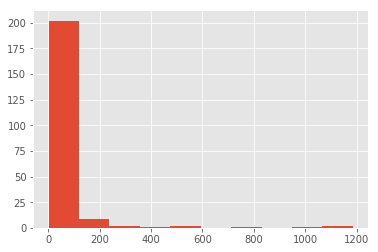

In [15]:
plt.hist(pi_ratio.values())

In [17]:
pi_ratio

{('alien', 'Akkermansia_muciniphila_55290'): 57.59996947991397,
 ('alien', 'Alistipes_onderdonkii_55464'): 3.130782738564879,
 ('alien', 'Alistipes_putredinis_61533'): 29.251807532243266,
 ('alien', 'Anaerostipes_hadrus_55206'): 31.1823900029077,
 ('alien', 'Bacteroides_cellulosilyticus_58046'): 1.7755076519613837,
 ('alien', 'Bacteroides_fragilis_54507'): 54.761673711093366,
 ('alien', 'Bacteroides_ovatus_58035'): 25.967773107152308,
 ('alien', 'Bacteroides_thetaiotaomicron_56941'): 42.79508145706008,
 ('alien', 'Bacteroides_uniformis_57318'): 2.32427077844539,
 ('alien', 'Bacteroides_vulgatus_57955'): 3.9366048759648953,
 ('alien', 'Bifidobacterium_adolescentis_56815'): 7.426218635163768,
 ('alien', 'Bifidobacterium_bifidum_55065'): 1.0,
 ('alien', 'Bifidobacterium_longum_57796'): 24.358895938988685,
 ('alien', 'Coprococcus_sp_62244'): 9.271799455011987,
 ('alien', 'Dialister_invisus_61905'): 29.3368475866333,
 ('alien', 'Eubacterium_eligens_61678'): 2.302581227562421,
 ('alien', 'Eu

In [ ]:
plt.hist(pi_m,bins=np.logspace(np.log10(1e-5),np.log10(1e-1),15))
plt.semilogx()

In [17]:
pi_s_vals = sorted(pi_s.values(), key=lambda x: np.mean(x))

/u/home/r/rwolff/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


[]

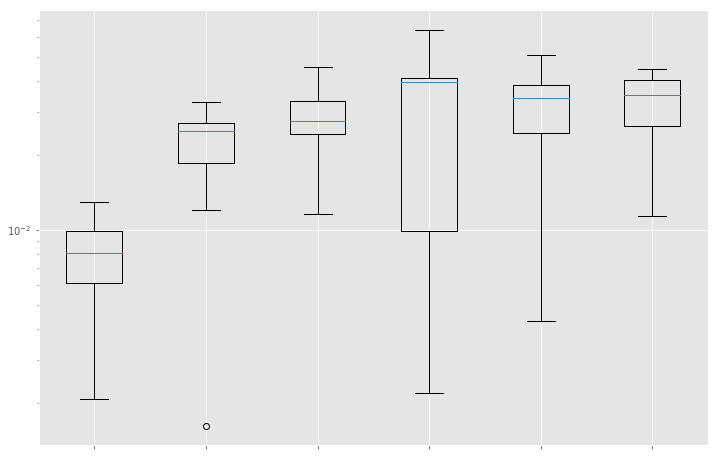

In [18]:
fig,ax = plt.subplots(figsize=(12,8))
ax.boxplot(pi_s_vals);
ax.semilogy()
ax.set_xticklabels([])

In [19]:
pi_s.keys()

dict_keys([('alien', 'Faecalibacterium_cf_62236'), ('alien', 'Faecalibacterium_prausnitzii_62201'), ('bugkiller', 'Phascolarctobacterium_sp_59817'), ('bugkiller', 'Sutterella_wadsworthensis_56828'), ('orion', 'Faecalibacterium_prausnitzii_57453'), ('orion', 'Faecalibacterium_prausnitzii_61481')])

In [10]:
y = np.logspace(np.log10(1e-5),np.log10(1e-1),1000)

In [11]:
surv = []
for ye in y:
    surv.append(sum(1*(pi_m > ye))/len(pi_m))

ZeroDivisionError: division by zero

ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

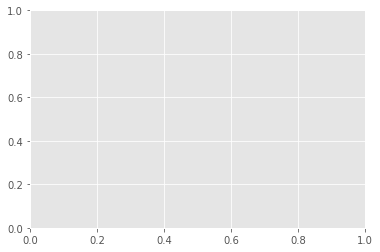

In [12]:
plt.plot(y,surv)
plt.semilogx()
plt.fill_between(y[500:],0,surv[500:],alpha=.2)
plt.fill_between(y[:500],0,surv[:500],alpha=.2,color="b")